#### 5.3.2.2 Scikit-Learn验证曲线

在Scikit-Learn 中，可以用一个带多项式预处理器的简单线性回归模型实现。我们将用一个管道命令来组合这两种操作（多项式特征与管道命令将在5.4 节介绍）：

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

现在来创造一些数据给模型拟合：

In [2]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # 随机轴样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

通过数据可视化，将不同次数的多项式拟合曲线画出来（如图5-27 所示）：

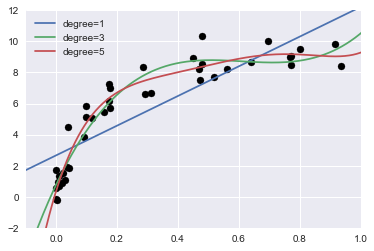

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # 设置图形样式

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

这个例子中控制模型复杂度的关键是多项式的次数，它只要是非负整数就可以。那么问题来了：究竟多项式的次数是多少，才能在偏差（欠拟合）与方差（过拟合）间达到平衡？

我们可以通过可视化验证曲线来回答这个问题——利用Scikit-Learn 的validation_curve函数就可以非常简单地实现。只要提供模型、数据、参数名称和验证范围信息，函数就会自动计算验证范围内的训练得分和验证得分（如图5-28 所示）：

D:\Python\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Python\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


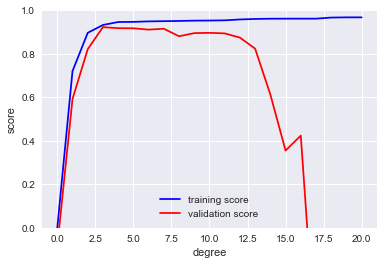

In [4]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree',
                                          degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

这幅图可以准确显示我们想要的信息：训练得分总是比验证得分高；训练得分随着模型复杂度的提升而单调递增；验证得分增长到最高点后由于过拟合而开始骤降。

从验证曲线中可以看出，偏差与方差均衡性最好的是三次多项式。我们可以计算结果，并将模型画在原始数据上（如图5-29 所示）：

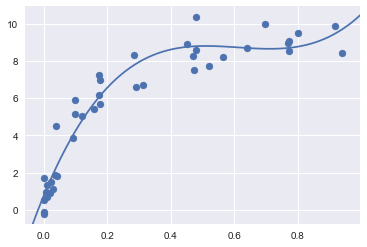

In [5]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

虽然寻找最优模型并不需要我们计算训练得分，但是检查训练得分与验证得分之间的关系可以让我们对模型的性能有更加直观的认识。